In [ ]:
### Customer 360 Degree View

# Import Library and Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
#CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Memanggil dataset
import pandas as pd
data1 = pd.read_csv("drive/MyDrive/Dataset Final Project/Online.csv")
data1.head()


,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,48497,20171231,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99
1,48496,20171231,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50
2,48495,20171231,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50
3,48494,20171231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50
4,48493,20171231,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50


In [ ]:
# Memanggil dataset
import pandas as pd
data2 = pd.read_csv("drive/MyDrive/Dataset Final Project/Marketing_Spend.csv")
data2.head()


,Date,Offline Spend,Online Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36
2,2017-01-03,4500,1576.38
3,2017-01-04,4500,2928.55
4,2017-01-05,4500,4055.30


# Explore, Cleaning and Preprocessing Data

## Eksplore Data

In [ ]:
# data shape
shape1 = data1.shape
shape2 = data2.shape

print("shape data1 : ", shape1)
print("shape data 2 : ", shape2)

shape data1 :  (54144, 10)
shape data 2 :  (365, 3)


In [ ]:
# data describe
desc = [data1, data2]

for i in desc:
    print(i.describe())

       Transaction ID          Date      Quantity    Avg. Price       Revenue  \
count    54144.000000  5.414400e+04  54139.000000  54144.000000  54144.000000   
mean     32337.041833  2.017068e+07      4.538429     51.483895    277.012997   
std       8633.814868  3.328993e+02     20.031432     63.589249    902.588057   
min      16679.000000  2.017010e+07      1.000000      0.390000      0.500000   
25%      25332.000000  2.017041e+07      1.000000      5.590000     53.170000   
50%      32548.000000  2.017071e+07      1.000000     16.990000    119.990000   
75%      39008.250000  2.017093e+07      2.000000    100.910000    268.000000   
max      48497.000000  2.017123e+07    900.000000    355.740000  23945.560000   

                Tax      Delivery  
count  54144.000000  54144.000000  
mean      14.731828     10.580648  
std       26.841324     19.690565  
min        0.000000      0.000000  
25%        0.000000      6.000000  
50%        6.810000      6.000000  
75%       17.84000

In [ ]:
# info data
info = [data1, data2]

for i in info:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54144 entries, 0 to 54143
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction ID                          54144 non-null  int64  
 1   Date                                    54144 non-null  int64  
 2   Product SKU                             54144 non-null  object 
 3   Product                                 54144 non-null  object 
 4   Product Category (Enhanced E-commerce)  52928 non-null  object 
 5   Quantity                                54139 non-null  float64
 6   Avg. Price                              54144 non-null  float64
 7   Revenue                                 54144 non-null  float64
 8   Tax                                     54144 non-null  float64
 9   Delivery                                54144 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 4.1+ MB
N

## Missing Value

In [ ]:
# Mengatasi Missing Value Data1
data1['Product Category (Enhanced E-commerce)'].fillna(value = 'no product category', axis = 0, inplace = True)
data1['Quantity'].fillna(value = 'No Quantity', axis = 0, inplace = True)
data1.dropna(axis = 0, inplace = True)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54144 entries, 0 to 54143
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction ID                          54144 non-null  int64  
 1   Date                                    54144 non-null  int64  
 2   Product SKU                             54144 non-null  object 
 3   Product                                 54144 non-null  object 
 4   Product Category (Enhanced E-commerce)  54144 non-null  object 
 5   Quantity                                54144 non-null  object 
 6   Avg. Price                              54144 non-null  float64
 7   Revenue                                 54144 non-null  float64
 8   Tax                                     54144 non-null  float64
 9   Delivery                                54144 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.5+ MB


## Merge Data Based on Date

In [ ]:
data1['Date'] = pd.to_datetime(data1['Date'],format='%Y%m%d')
data1.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50


In [ ]:
data2 = data2.rename(columns = {'Unnamed: 0':'Date'})
data2['Date'] = pd.to_datetime(data2['Date'])
data2.head()

,Date,Offline Spend,Online Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36
2,2017-01-03,4500,1576.38
3,2017-01-04,4500,2928.55
4,2017-01-05,4500,4055.30


In [ ]:
df = data1.merge(right = data2, how = 'left', on = 'Date')
df.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,Offline Spend,Online Spend
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,4000,2058.75
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50,4000,2058.75
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50,4000,2058.75
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50,4000,2058.75
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50,4000,2058.75


In [ ]:
df = df.sort_values(by = 'Date', ascending = False)
df.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,Offline Spend,Online Spend
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,4000,2058.75
43,48461,2017-12-31,GGOENEBQ086799,Nest® Thermostat E - USA,Nest,1.0,100.91,218.00,20.21,6.50,4000,2058.75
50,48456,2017-12-31,GGOENEBQ078999,Nest® Cam Outdoor Security Camera - USA,Nest-USA,1.0,121.30,468.00,45.09,6.50,4000,2058.75
49,48457,2017-12-31,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,1.0,151.88,149.00,13.22,6.50,4000,2058.75
47,48459,2017-12-31,GGOEGDHQ086199,Google White Force 17 oz Bottle,Drinkware,1.0,24.45,173.98,0.00,6.00,4000,2058.75


## Rename Column

In [ ]:
df= df.rename({'Transaction ID' : 'Transaction_ID', 'Product SKU' : 'Product_ID', 'Product Category (Enhanced E-commerce)' : 'Product_Category',
               'Avg. Price' : 'Avg_Price', 'Offline Spend' : 'offline_spend', 'Online Spend' : 'online_spend'}, axis=1)
df.head()

,Transaction_ID,Date,Product_ID,Product,Product_Category,Quantity,Avg_Price,Revenue,Tax,Delivery,offline_spend,online_spend
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,4000,2058.75
43,48461,2017-12-31,GGOENEBQ086799,Nest® Thermostat E - USA,Nest,1.0,100.91,218.00,20.21,6.50,4000,2058.75
50,48456,2017-12-31,GGOENEBQ078999,Nest® Cam Outdoor Security Camera - USA,Nest-USA,1.0,121.30,468.00,45.09,6.50,4000,2058.75
49,48457,2017-12-31,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,1.0,151.88,149.00,13.22,6.50,4000,2058.75
47,48459,2017-12-31,GGOEGDHQ086199,Google White Force 17 oz Bottle,Drinkware,1.0,24.45,173.98,0.00,6.00,4000,2058.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54144 entries, 0 to 54143
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    54144 non-null  int64         
 1   Date              54144 non-null  datetime64[ns]
 2   Product_ID        54144 non-null  object        
 3   Product           54144 non-null  object        
 4   Product_Category  54144 non-null  object        
 5   Quantity          54144 non-null  object        
 6   Avg_Price         54144 non-null  float64       
 7   Revenue           54144 non-null  float64       
 8   Tax               54144 non-null  float64       
 9   Delivery          54144 non-null  float64       
 10  offline_spend     54144 non-null  int64         
 11  online_spend      54144 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 5.4+ MB


## Descriptive statistics

In [ ]:
df_stats = df[['Avg_Price', 'Revenue', 'Tax', 'Delivery']]
df_stats.describe()

,Avg_Price,Revenue,Tax,Delivery
count,54144.000000,54144.000000,54144.000000,54144.000000
mean,51.483895,277.012997,14.731828,10.580648
std,63.589249,902.588057,26.841324,19.690565
min,0.390000,0.500000,0.000000,0.000000
25%,5.590000,53.170000,0.000000,6.000000
50%,16.990000,119.990000,6.810000,6.000000
75%,100.910000,268.000000,17.840000,6.500000
max,355.740000,23945.560000,754.140000,521.360000


# Dataset Insight Analysis

### Top Product

**Based on Product Category**

In [ ]:
#Buat grouping untuk menghitung total Quantity berdasarkan Product Category
top_cat = df.groupby('Product_Category')['Quantity'].count().reset_index().sort_values(by = 'Quantity', ascending = False).head()
top_cat

,Product_Category,Quantity
2,Apparel,18126
16,Nest-USA,14013
18,Office,6515
6,Drinkware,3485
12,Lifestyle,3092


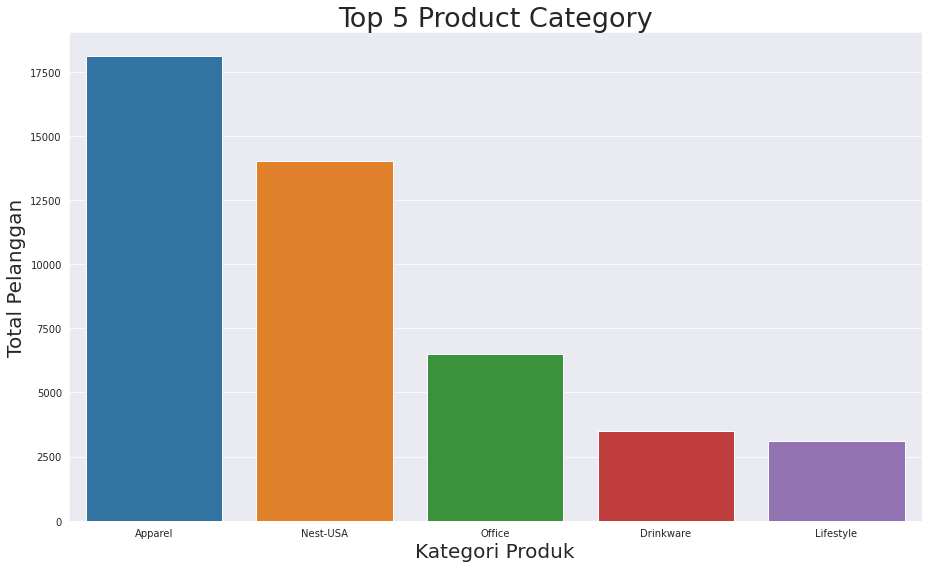

In [ ]:
#Visualisasi
plt.figure(figsize = (13, 8))
ax = sns.barplot(x = top_cat[('Product_Category')], y = top_cat['Quantity'])
plt.title('Top 5 Product Category', fontsize=27)
plt.xlabel('Kategori Produk', fontsize=20)
plt.ylabel('Total Pelanggan', fontsize=20)
plt.tight_layout()

**Based From Each Category**

In [ ]:
#Buat grouping untuk menghitung total Quantity berdasarkan
top_prod = df.groupby(['Product', 'Product_Category'])['Quantity'].count().reset_index().sort_values(by = 'Quantity', ascending = True)
top_prod.head(11)

,Product,Product_Category,Quantity
71,Android Women's Short Sleeve Tri-blend Badge T...,Apparel,1
92,Digital Lightshow Smart Speaker and Notificati...,no product category,1
128,Google Cappy Bib Blue,no product category,1
70,Android Women's Short Sleeve Hero Tee Black,no product category,1
160,Google Large Standard Journal Grey,Office,1
265,Google Women's Colorblock Tee White,Apparel,1
89,Compact Journal with Recycled Pages,Office,1
392,Women's YouTube Short Sleeve Hero Tee Black,no product category,1
68,Android Women's Short Sleeve Badge Tee Dark He...,no product category,2
236,Google Tee Red,Apparel,2


In [ ]:
cat = top_cat['Product_Category'].tail().unique()
cat

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle'],
      dtype=object)

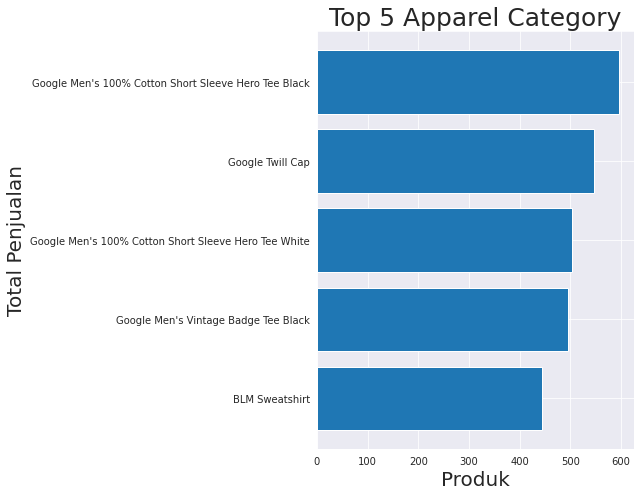

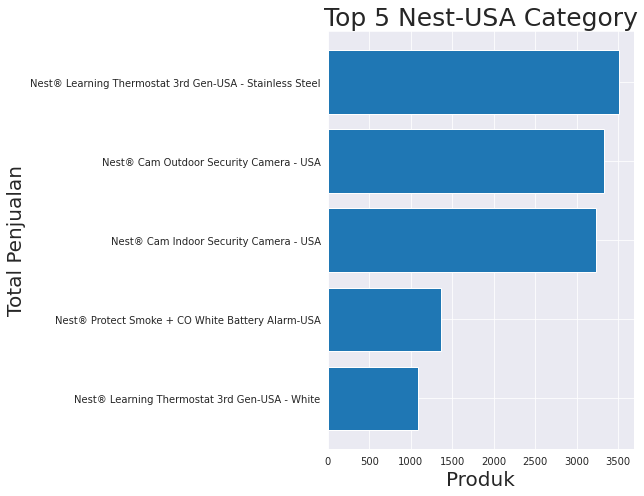

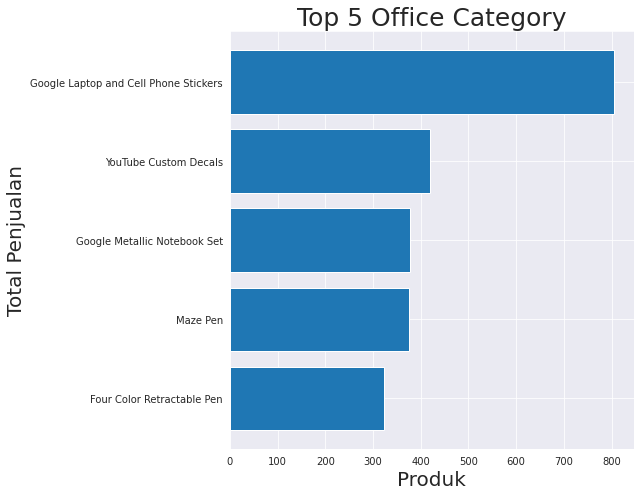

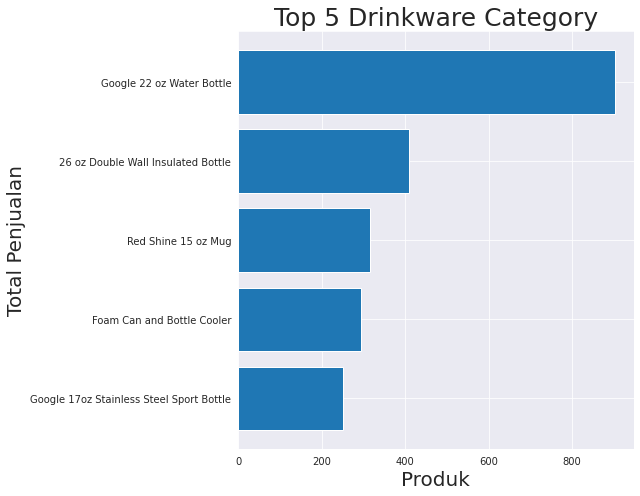

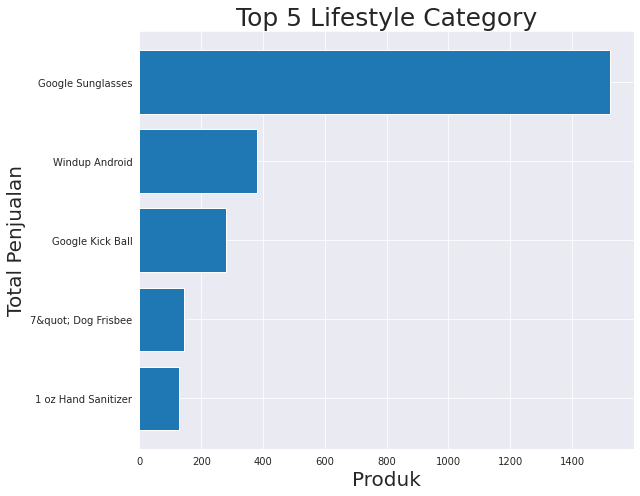

In [ ]:
for prod in cat:
  category = top_prod[top_prod['Product_Category'] == prod].tail(5)
  plt.figure(figsize=(9, 7))
  plt.barh(category[('Product')], category['Quantity'])
  tit = 'Top 5 {} Category'.format(prod)
  plt.title(tit, fontsize=25)
  plt.xlabel('Produk', fontsize=20)
  plt.ylabel('Total Penjualan', fontsize=20)
  plt.tight_layout()

### Melihat Perbandingan Pengeluaran Pembelian secara Online & Offline

In [ ]:
#Berdasarkan bulan
data2['month'] = data2['Date'].dt.month
data2

,Date,Offline Spend,Online Spend,month
0,2017-01-01,4500,2424.50,1
1,2017-01-02,4500,3480.36,1
2,2017-01-03,4500,1576.38,1
3,2017-01-04,4500,2928.55,1
4,2017-01-05,4500,4055.30,1
...,...,...,...,...
360,2017-12-27,4000,3396.87,12
361,2017-12-28,4000,3246.84,12
362,2017-12-29,4000,2546.58,12
363,2017-12-30,4000,674.31,12


In [ ]:
#Buat tabel kategori Pengeluaran Online Offline perbulan
market = data2.groupby('month')['Online Spend', 'Offline Spend'].sum().round().reset_index()
market

<ipython-input-67-d4be10f6a898>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  market = data2.groupby('month')['Online Spend', 'Offline Spend'].sum().round().reset_index()


,month,Online Spend,Offline Spend
0,1,58329.0,96600
1,2,55808.0,81300
2,3,48750.0,73500
3,4,61027.0,96000
4,5,52760.0,65500
5,6,53818.0,80500
6,7,52718.0,67500
7,8,57404.0,85500
8,9,52515.0,83000
9,10,57725.0,93500


In [ ]:
mapping_month = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : ' jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Des'
}
market['month'] = market['month'].map(mapping_month)

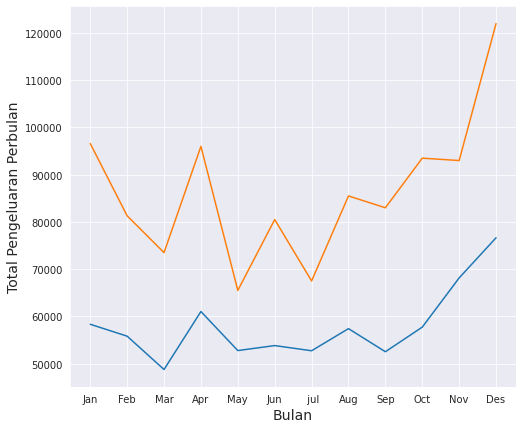

In [ ]:
plt.figure(figsize = (8, 7))
plt.plot(market['month'], market['Online Spend'])
plt.plot(market['month'], market['Offline Spend'])
plt.xlabel("Bulan", fontsize = 14)
plt.ylabel("Total Pengeluaran Perbulan", fontsize = 14)
plt.show()


Note :
*   Garis Orange merupakan grafik pengeluaran secara Offline
*   Garis Biru merupakan grafik pengeluaran secara Online

Dilihat dari grafik pengeluaran pembeli yang melakukan pembelian secara Online dan Offline, Pembeli cenderung memiliki pengeluaran pembelian secara Offline daripada Online. Hal ini bisa dikarenakan oleh beberapa faktor:

*   Penelusuran barang secara offline dirasa lebih aman dan memuaskan pembeli sehingga tidak ada keraguan ketika membeli. Sehingga ketika membeli dalam jumlah besar, mereka tidak ragu.

*   Pemasaran atau Teknik Marketing barang yang bisa dilakukan di sosial media kurang bisa jadi kurang menyeluruh pada deskripsi barang atau kurang menyebar luas jangkauan pasarnya sehingga pengeluaran secara Online memiliki nilai lebih kecil daripada secara Offline. Google bisa melakukan reach out pasar dengan memanfaatkan Influencer yang tentunya memiliki berbagai macam latar belakang viewers, shingga pasar bisa menjadi lebih luas. Influencer juga cenderung lebih interaktif ketika memasarkan suatu barang, dibanding hanya mengandalkan sebuah iklan biasa.




### Pembelian Berdasarkan Tanggal dan Hari (Costumer Characteristic)

**Berdasarkan Tanggal**

In [ ]:
df['month'] = df['Date'].dt.month

In [ ]:
df['day'] = df['Date'].dt.day

In [ ]:
date_sales2 = df.groupby('day')['Revenue'].mean().reset_index().sort_values(by = 'day', ascending = True)



In [ ]:
mapping_day= {
    1 : '1',
    2 : '2',
    3 : '3',
    4 : '4',
    5 : '5',
    6 : '6',
    7 : '7',
    8 : '8',
    9 : '9',
    10 : '10',
    11 : '11',
    12 : '12',
    13 : '13',
    14 : '14',
    15 : '15',
    16 : '16',
    17 : '17',
    18 : '18',
    19 : '19',
    20 : '20',
    21 : '21',
    22 : '22',
    23 : '23',
    24 : '24',
    25 : '25',
    26 : '26',
    27 : '27',
    28 : '28',
    29 : '29',
    30 : '30',
    31 : '31'
}
date_sales2['day'] = date_sales2['day'].map(mapping_day)

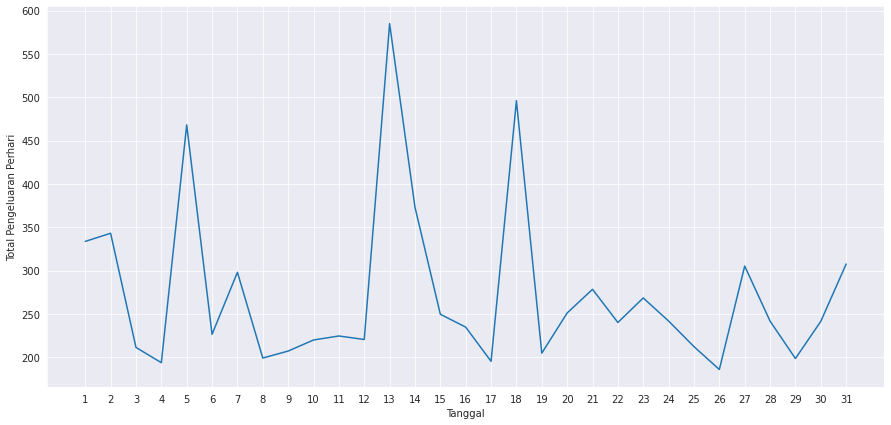

In [ ]:
plt.figure(figsize = (15, 7))
plt.plot(date_sales2['day'], date_sales2['Revenue'])
plt.xlabel("Tanggal")
plt.ylabel("Total Pengeluaran Perhari")
plt.show()

Berdasarkan Grafik yang didapat, kita dapat mengambil insight bahwa penjualan dengan pendapatan tertinggi terjadi pada tanggal muda, hal itu berarti tingkat transaksi pelanggan di tanggal-tanggal tersebut dapat dikaitkan dengan adanya kebiasaan warga yang mendapat upah kerja mereka atau pemasukan setiap pribadi terjadi di awal bulan. Sedangkan penjualan dengan pendapatan dari toko yang terendah terjadi pada tanggal tua mulai tanggal 19-31  yang angka pendapatannya lebih rendah dari tanggal sebelumnya, ini berarti tingkat transaksi pelanggan di tanggal itu juga rendah atau lebih sedikit orang melakukan pembelian.

**Berdasarkan Hari**

In [ ]:
df['day2'] = df['Date'].dt.strftime("%A")

In [ ]:
date_sales3 = df.groupby('day2')['Revenue'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
date_sales3

,day2,Revenue
0,Monday,247.150628
1,Tuesday,326.386023
2,Wednesday,358.934134
3,Thursday,259.796179
4,Friday,267.292073
5,Saturday,201.452786
6,Sunday,195.324702


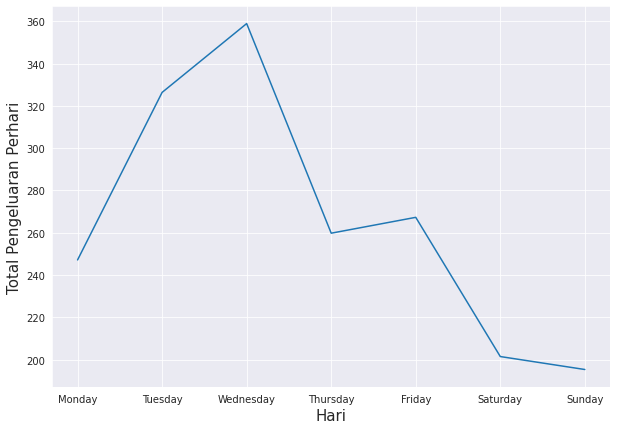

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(date_sales3['day2'], date_sales3['Revenue'])
plt.xlabel("Hari", fontsize = 15)
plt.ylabel("Total Pengeluaran Perhari", fontsize = 15)
plt.show()

Berdasarkan Grafik yang didapat, kita mendapat insight bahwa penjualan dengan pendapatan tertinggi terjadi pada hari Rabu yaitu angka pendapatannya mencapai 360, hal tu berarti tingkat transaksi pelanggan di hari itu juga tinggi. Sedangkan penjualan dengan pendapatan terendah terjadi pada hari Minggu yang angka pendapatannya kurang dari 200, ini berarti tingkat transaksi pelanggan di hari itu sangat rendah.

=> Dari Kedua Insight yang telah diambil dari pembelian berdasarkan  Tanggal dan Hari. Kami dapat menyarankan insight bahwa pembeli biasanya akan condong melakukan pembelian online saat hari kerja karena dirasa lebih efisien serta lebih sering melakukan pembelian saat pertengahan bulan

### **Rata-Rata Kuantitas Pembeli Ketika Membeli Barang (Costumer Characteristic)**

In [ ]:
k = df['Quantity'].value_counts().reset_index()
k1 = k.head(5)
k1

,index,Quantity
0,1.0,35965
1,2.0,7162
2,3.0,2360
3,5.0,1803
4,4.0,1283


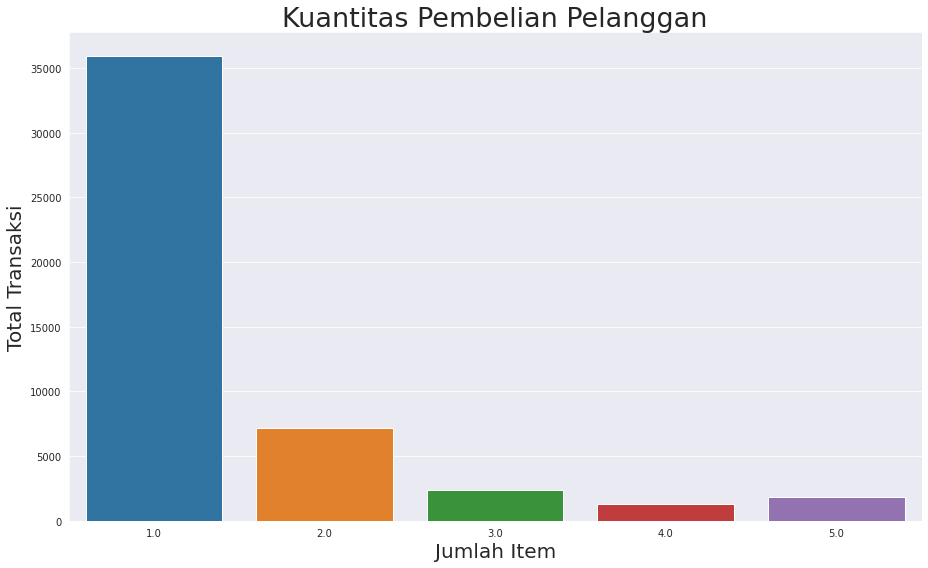

In [ ]:
#Visualisasi
plt.figure(figsize = (13, 8))
ax = sns.barplot(x = k1[('index')], y = k1['Quantity'])
plt.title('Kuantitas Pembelian Pelanggan', fontsize=27)
plt.xlabel('Jumlah Item', fontsize=20)
plt.ylabel('Total Transaksi', fontsize=20)
plt.tight_layout()

In [ ]:
top_5 = df['Quantity'].value_counts(normalize=True).reset_index()[:5]
top_5

,index,Quantity
0,1.0,0.664247
1,2.0,0.132277
2,3.0,0.043587
3,5.0,0.033300
4,4.0,0.023696


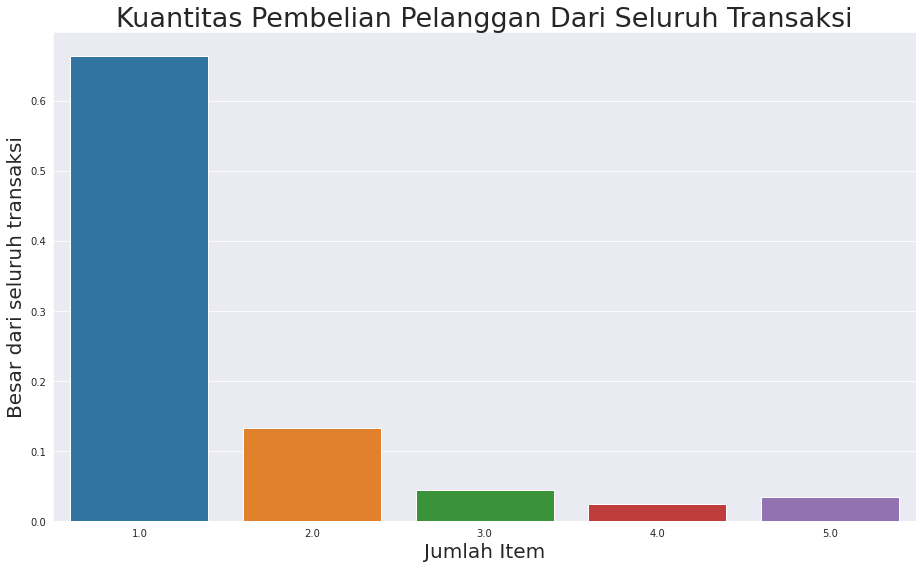

In [ ]:
plt.figure(figsize = (13, 8))
ax = sns.barplot(x = top_5[('index')], y = top_5['Quantity'])
plt.title('Kuantitas Pembelian Pelanggan Dari Seluruh Transaksi', fontsize=27)
plt.xlabel('Jumlah Item', fontsize=20)
plt.ylabel('Besar dari seluruh transaksi', fontsize=20)
plt.tight_layout()

In [ ]:
k2 = k.tail(5)
k2

,index,Quantity
147,78.0,1
148,59.0,1
149,307.0,1
150,79.0,1
151,516.0,1


In [ ]:
Bottom_5 = df['Quantity'].value_counts(normalize=True).sort_values().reset_index()[:5]
Bottom_5

,index,Quantity
0,516.0,0.000018
1,111.0,0.000018
2,101.0,0.000018
3,900.0,0.000018
4,43.0,0.000018


Dari gambar disamping diketahui bahwa kuantitas pembeli ketika membeli barang paling banyak membeli 1-5 barang dengan presentase sekitar 66% pembeli membeli 1 item dari seluruh transaksi yang ada, Sedangkan kuantitas pembelian barang paling sedikit membeli 516 barang, dengan presentase sekitar 0,0018% pembeli membeli 516 item sekaligus dari seluruh transaksi yang afa. Hal tersebut karena tingkat konsumsifitas pelanggan di toko retail(Google Store) masih rendah para pelanggan belum tertarik untuk membeli barang banyak di toko retail(Google Store). Maka dari itu insight ini merupakan bukti tambahan bahwa pembelian dengan jumlah kecil secara online yang menyebabkan Pendapatan secara online lebih kecil dari offline dan dapat dijadikan bahan evaluasi bagi Toko Retail tersebut untuk meningkatkan penjualan dan mungkin jenis barang agar pembelian naik.

# Conclusion



1. Costumer cenderung membeli secara Offline karena adanya rasa lebih leluasa dan aman dalam penelusuran barang, dan perlunya peningkatan pemasaran atau audience secara Online.
2. Pembelian barang cenderung dilakukan pada tanggal muda dan hari kerja. Hal ini bisa menjadi pertimbangan untuk dijadikan patokan oleh tim Marketing dalam pengambilan keputusan tentang kapan adanya Diskon dan event tertentu.
3. Pelanggan dengan pembelian barang dengan kuantitas sedikit (< 5) sebanyak 22782. Sedangkan kuantitas pembelian barang oleh pelanggan dengan kategori Banyak (>= 5) hanya sebanyak 2438. bukti tambahan bahwa pembelian dengan jumlah kecil secara online yang menyebabkan Pendapatan secara online lebih kecil dari offline.



